# Limpieza de datos

* Preparar datos para el analisis
* Los datos la mayoria de las veces no vienen limpios

## Problemas comunes al trabajar con datos:

* Datos faltantes (missing data) <br>
* Datos anormales (Outliers) <br>
* Estructura de la BD no apta para el modelo (Tidy data)<br>
* Datos con formato inadecuado <br>


# Vamos a ver
* Introduccion al analisis exploratorio
* Llevar los datos a una estructura adecuada para hacer ML (tidying data)
* Tratamiento de datos faltantes
* Agregacion de variables
* Estandarizacion
* Escalamiento
* One hot enconding
* Preprocesamiento de variables del tiempo

## Introduccion al analisis exploratorio

Dataset <br>
https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2

Una lista de las solicitudes de trabajo presentadas para un día en particular y los datos asociados. Los informes semanales y mensuales anteriores se archivan en el DOB y no están disponibles en los datos abiertos de la Ciudad de Nueva York.

**Nota:** estas solicitudes de trabajo se envían a través de las oficinas municipales, a través de eFiling o a través del HUB. Este conjunto de datos no incluye los trabajos enviados a través de DOB NOW.<br>

https://webcache.googleusercontent.com/search?q=cache:rL9eJRCD8aMJ:https://www.opendatanetwork.com/dataset/data.cityofnewyork.us/ic3t-wcy2+&cd=3&hl=en&ct=clnk&gl=co



In [2]:
import pandas as pd

# leer el archivo en una dataframe df
df = pd.read_csv('dob_job_application_filings_subset.csv',low_memory=False)

In [3]:
# Explorar los datos en forma tabular
df.head(10)

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM
5,121589753,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,Q,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,GENERAL CONSTRUCTION CHANGES TAKING PLACE ON T...,04/26/2013 12:00:00 AM
6,320738001,1,BROOKLYN,437,TOMPKINS AVENUE,1846,9,3331251,A2,P,...,SALEH,TOMPKINS DELI,437,TOMPKINS AVENUE,BROOKLYN,NY,11216,6462675576,"APPLICATION FILED TO INSTALL A EXHAUST HOOD, D...",04/26/2013 12:00:00 AM
7,121601374,1,MANHATTAN,99,JOHN ST,76,7502,1087867,A2,D,...,FRANCESE,SKYLINE REALTY,75,MAIDEN LANE,NY,NY,10038,6464219861,COMBINE APT 502 AND 503 MINOR PARTITION WORK ...,04/26/2013 12:00:00 AM
8,121583054,1,MANHATTAN,1355,FIRST AVENUE,1447,27,1088591,A2,D,...,MENDLOW,BLUE ROCK REAL ESTATE,70,EAST 55 STREET,NEW YORK,NY,10022,2128431601,INSTALLATION OF TEMPORARY VERTICAL NETTING (CO...,04/26/2013 12:00:00 AM
9,121601392,1,MANHATTAN,1,MANHATTAN PLAZA,9999,1,1813346,A2,P,...,PORTER,CARAVENTS INC.,337,S ROBERSON BLVD.,BEVERLY HILLS,CA,90211,3108559595,INSTALLATION OF POTENTIAL TEMPORARY RAIN CONTI...,04/26/2013 12:00:00 AM


In [5]:
# Explorar los datos en forma tabular
df.tail()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,...,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


In [6]:
# explorar en numero de registros y descriptores
print(df.shape)

(12846, 82)


In [7]:
# explorar los nombres de los descriptores
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [8]:
# Identificar el formato de los datos y posibles datos faltantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Job #                         12846 non-null  int64  
 1   Doc #                         12846 non-null  int64  
 2   Borough                       12846 non-null  object 
 3   House #                       12846 non-null  object 
 4   Street Name                   12846 non-null  object 
 5   Block                         12846 non-null  int64  
 6   Lot                           12846 non-null  int64  
 7   Bin #                         12846 non-null  int64  
 8   Job Type                      12846 non-null  object 
 9   Job Status                    12846 non-null  object 
 10  Job Status Descrp             12846 non-null  object 
 11  Latest Action Date            12846 non-null  object 
 12  Building Type                 12846 non-null  object 
 13  C

In [9]:
# Explorar estadisticos de variables numericas
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


In [10]:
# explorar cuantos registros hay por un tipo de variable categorica, en este caso Borough (localidad)
print(df['Borough'].value_counts(dropna=False))

Borough
MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: count, dtype: int64


In [11]:
# explorar cuantos registros hay por un tipo de variable categorica 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

Site Fill
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: count, dtype: int64


## Visualizacion de variables

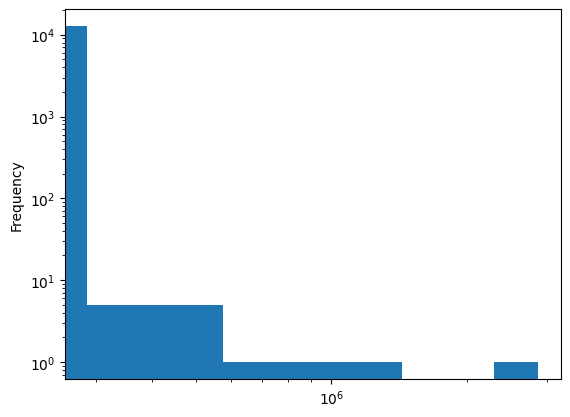

In [12]:
#comando interno de jupyter, en otro IDE no es reconocido
%matplotlib inline

#una de las librerias mas famosas para graficar en python
import matplotlib.pyplot as plt

# Construimos una grafica de tipo histograma, kind podria ser scatter o line por ejemplo
df['Existing Zoning Sqft'].plot(kind='hist', rot=0, logx=True, logy=True)

# graficamos el histograma
plt.show()

In [13]:
#vemos un dato numerico que por el signo $ es reconocido como texto, es un problema tipico que los datos
#numericos no son reconocidos como numeros.

df['Initial Cost'].head()

0    $75000.00
1        $0.00
2    $30000.00
3     $1500.00
4    $19500.00
Name: Initial Cost, dtype: object

**A continuacion, se presentan dos formas de procesar el texto y convertirlo a numerico**

In [15]:
# Usando el metodo replace de la clase string
df['initial_cost_replace'] = df['Initial Cost'].apply(lambda x: x.replace('$', ''))

In [16]:
# Usando expresiones regulares
import re
df['initial_cost_regex'] = df['Initial Cost'].apply(lambda x: re.findall('\d+\.\d+', x)[0])

In [17]:
#comparemos los resultados obtenidos
df[['Initial Cost','initial_cost_replace','initial_cost_regex']].head()

,Initial Cost,initial_cost_replace,initial_cost_regex
0,$75000.00,75000.00,75000.00
1,$0.00,0.00,0.00
2,$30000.00,30000.00,30000.00
3,$1500.00,1500.00,1500.00
4,$19500.00,19500.00,19500.00


In [18]:
# revisemos el formato de nuestros datos
df[['Initial Cost','initial_cost_replace','initial_cost_regex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Initial Cost          12846 non-null  object
 1   initial_cost_replace  12846 non-null  object
 2   initial_cost_regex    12846 non-null  object
dtypes: object(3)
memory usage: 301.2+ KB


In [19]:
#casting a variables numericas
df['initial_cost_replace']=df['initial_cost_replace'].astype("float64")
df['initial_cost_regex']=df['initial_cost_regex'].astype("float64")

df[['Initial Cost','initial_cost_replace','initial_cost_regex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Initial Cost          12846 non-null  object 
 1   initial_cost_replace  12846 non-null  float64
 2   initial_cost_regex    12846 non-null  float64
dtypes: float64(2), object(1)
memory usage: 301.2+ KB


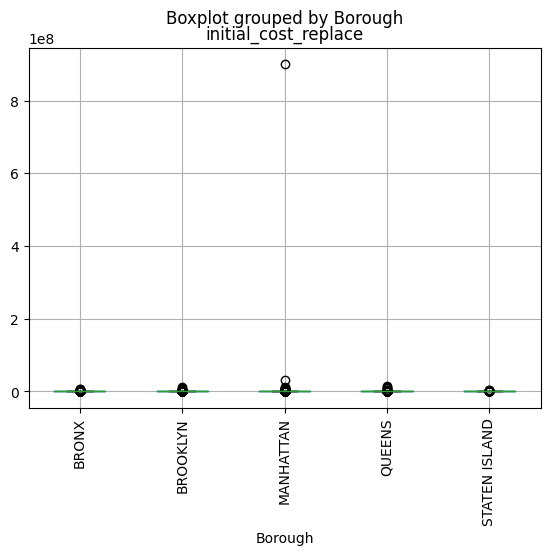

In [20]:
# Los boxplot es una excelente forma de detectar outliers
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost_replace', by='Borough', rot=90)

# Display the plot
plt.show()

In [21]:
df['initial_cost_replace'].describe()

count    1.284600e+04
mean     1.803139e+05
std      7.961524e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.597500e+04
75%      6.790500e+04
max      9.003000e+08
Name: initial_cost_replace, dtype: float64

In [22]:
# Los outliers se deben investigar y determinar si son errores o no.
df=df[df['initial_cost_replace']<9e+08]

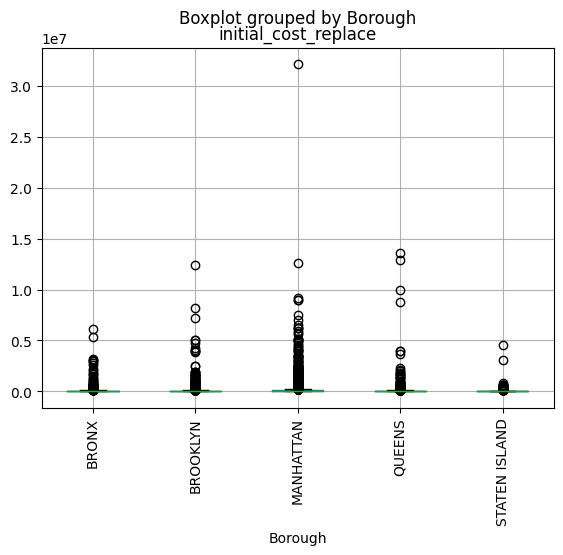

In [23]:
df.boxplot(column='initial_cost_replace', by='Borough', rot=90)
plt.show()